# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

Import the core data science libraries:

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [24]:
# place your code into this Code cell
df = pd.read_csv("/Users/brandongao/pandas-assignment/data/COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240430.csv")
df


,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582
...,...,...,...,...,...,...
176143,10/01/2021,11/18/2020,21551,2483,163,41
176144,10/01/2021,03/17/2021,13961,1678,166,27
176145,10/01/2021,03/09/2020,401,89,36,19
176146,10/01/2021,09/10/2021,14573,503,38,0


In [25]:
import os
current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: /Users/brandongao/pandas-assignment


## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [26]:
#Show 5 rows, selected at random, from the data set.
print(df.sample(5))


       extract_date specimen_date  Number_tested  Number_confirmed  \
165307   09/13/2021    07/16/2021           8116               243   
53680    01/27/2021    03/04/2020             33                 7   
78684    03/29/2021    04/18/2020           6571              2500   
4544     06/03/2020    03/12/2020           1568               401   
17657    08/31/2020    05/17/2020           6042               347   

        Number_hospitalized  Number_deaths  
165307                   19              1  
53680                    16              2  
78684                   613            216  
4544                     97             31  
17657                    59              9  


In [27]:
#Show each of the column names and their data types
print(df.dtypes)

extract_date           object
specimen_date          object
Number_tested           int64
Number_confirmed        int64
Number_hospitalized     int64
Number_deaths           int64
dtype: object


In [29]:
#Show any unique features of your chosen dataset
#Showing the count,mean, standard deviation, minimum, 25% Percentile, 50% Percentile, 75% Percentile, Maximum of each of my numerical column
print(df.describe())


       Number_tested  Number_confirmed  Number_hospitalized  Number_deaths
count  176148.000000     176148.000000        176148.000000  176148.000000
mean    11141.475714       1427.914680           234.946375      73.940686
std      6413.050113       1368.222368           392.006729     160.110002
min         1.000000          0.000000             0.000000       0.000000
25%      6738.000000        371.000000            38.000000       4.000000
50%     10885.000000       1135.000000           115.000000      21.000000
75%     16448.000000       1960.000000           199.000000      44.000000
max     24727.000000       6852.000000          2016.000000     923.000000


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### 1.Checking if there is any null values in the data, because there are 0 null value for all columns. Hence, there is no null value in the data, no need to add or delete data for this reason

In [31]:
# Checking if there is any null values in the data
print(df.isnull().sum())


extract_date           0
specimen_date          0
Number_tested          0
Number_confirmed       0
Number_hospitalized    0
Number_deaths          0
dtype: int64


### 2.when I try to convert string dates from extract_date and specimen_date, an error appeared, which shows: OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2299-07-21 00:00:00 present at position 277
### There appears to be an invalid date

In [33]:
df['extract_date'] = pd.to_datetime(df['extract_date'])
df['specimen_date'] = pd.to_datetime(df['specimen_date'])

print(df.head())

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2299-07-21 00:00:00 present at position 277

### 3. We can directly convert the dates to datetime format if no error occurs. Otherwise, we can convert the out of bound data into a Not a Time dataformat, and remove the row containing the invalid date in by filtering out the NoT type using the pandas dropna() function. As a result, the invalid date with 2299-07-21 timestamp is removed, and the rest of the time is converted to datetime

In [44]:
def filter_dates(df, date_columns):
    for column in date_columns:
        df[column] = pd.to_datetime(df[column], errors='coerce')
    df = df.dropna(subset=date_columns)
    return df

date_columns = ['extract_date', 'specimen_date']
df = filter_dates(df, date_columns)

In [45]:
# The data types for the dates are now datetime64
print(df.dtypes)

extract_date           datetime64[ns]
specimen_date          datetime64[ns]
Number_tested                   int64
Number_confirmed                int64
Number_hospitalized             int64
Number_deaths                   int64
dtype: object


In [46]:
#Display 5 sample rows of the modified data
print(df.sample(5))


       extract_date specimen_date  Number_tested  Number_confirmed  \
85218    2021-04-14    2020-08-27          15571              1198   
114178   2021-05-05    2020-07-30          15540              1247   
85870    2021-04-15    2020-09-09          18271              1358   
64991    2021-02-26    2020-05-16           6675               751   
46318    2021-01-02    2020-10-05          21015               904   

        Number_hospitalized  Number_deaths  
85218                    98             21  
114178                  132             22  
85870                   111             18  
64991                   112             18  
46318                    62              4  


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. Grouping the specimen_date by months, finding the averages of numbers within the month for each column 

In [49]:
df['month_year'] = df['specimen_date'].dt.to_period('M')
monthly_data = df.groupby('month_year').mean()
print(monthly_data)

            Number_tested  Number_confirmed  Number_hospitalized  \
month_year                                                         
2020-01          7.977763          1.684126             0.167984   
2020-02          1.847248          0.338379             0.206728   
2020-03       3615.830210       2213.245649           666.955855   
2020-04       8856.352349       3835.653846           990.651136   
2020-05      11928.370171       1367.050644           171.536572   
2020-06      14825.359438        847.393032           102.010613   
2020-07      14799.852372        872.221556            89.030133   
2020-08      13930.214672        782.897495            74.494924   
2020-09      14108.982818        856.066898            75.391153   
2020-10      14268.919499        987.276745            86.617718   
2020-11      16124.712973       1593.848939           122.578539   
2020-12      16528.021757       2366.048633           191.883188   
2021-01      16727.216811       2689.417854     

/var/folders/ym/tr9p7y314096r29j5qvndy4c0000gn/T/ipykernel_67036/364749671.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = df.groupby('month_year').mean()


### 2.Construct Correlation Matrix to discover the how much correlation are between the columns. Findings: the number_confirmed, number_hospitalized, number_deaths columns are highly correlated with each other, and the number_tested column has low correlation with all other three columns

In [50]:
correlation_matrix = df[['Number_tested', 'Number_confirmed', 'Number_hospitalized', 'Number_deaths']].corr()
print(correlation_matrix)

                     Number_tested  Number_confirmed  Number_hospitalized  \
Number_tested             1.000000          0.273451            -0.066410   
Number_confirmed          0.273451          1.000000             0.873878   
Number_hospitalized      -0.066410          0.873878             1.000000   
Number_deaths            -0.114014          0.829976             0.987081   

                     Number_deaths  
Number_tested            -0.114014  
Number_confirmed          0.829976  
Number_hospitalized       0.987081  
Number_deaths             1.000000  


### 3.Find the top 5 days with the most number of tests

In [51]:
top_testing_days = df.sort_values(by='Number_tested', ascending=False).head(5)
print(top_testing_days)

       extract_date specimen_date  Number_tested  Number_confirmed  \
109825   2021-05-02    2021-01-04          24727              4207   
97322    2021-05-05    2021-01-04          24727              4213   
113567   2021-05-08    2021-01-04          24727              4217   
112666   2021-05-04    2021-01-04          24726              4212   
92282    2021-05-03    2021-01-04          24726              4210   

        Number_hospitalized  Number_deaths month_year  
109825                  289             48    2021-01  
97322                   289             49    2021-01  
113567                  289             49    2021-01  
112666                  289             49    2021-01  
92282                   289             49    2021-01  


### 4.Total percentage of death out of the confirmed cases

In [52]:
total_confirmed = df['Number_confirmed'].sum()

total_deaths = df['Number_deaths'].sum()

death_rate = (total_deaths / total_confirmed) * 100
print(f"Percentage of confirmed cases resulting in death: {death_rate:.2f}%")

Percentage of confirmed cases resulting in death: 5.18%


### 5.Sort the data by highest number of death

In [54]:
sorted_by_deaths = df.sort_values(by='Number_deaths', ascending=False)
print(sorted_by_deaths.head())

       extract_date specimen_date  Number_tested  Number_confirmed  \
173987   2021-09-28    2020-04-06          10935              6851   
175088   2021-09-30    2020-04-06          10935              6852   
174632   2021-09-29    2020-04-06          10935              6852   
175951   2021-10-01    2020-04-06          10935              6852   
173091   2021-09-27    2020-04-06          10935              6851   

        Number_hospitalized  Number_deaths month_year  
173987                 1979            923    2020-04  
175088                 1980            923    2020-04  
174632                 1979            923    2020-04  
175951                 1980            923    2020-04  
173091                 1979            922    2020-04  


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1.Line chart of number tested and number confirmed

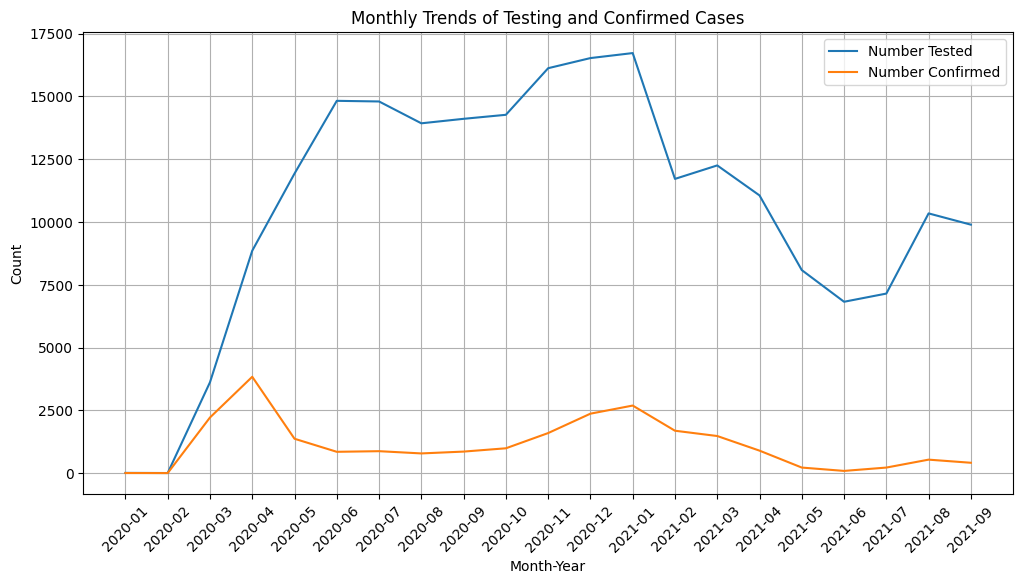

In [59]:
import matplotlib.pyplot as plt

monthly_tests_cases = monthly_data[['Number_tested', 'Number_confirmed']]
plt.figure(figsize=(12, 6))
plt.plot(monthly_tests_cases.index.astype(str), monthly_tests_cases['Number_tested'], label='Number Tested')
plt.plot(monthly_tests_cases.index.astype(str), monthly_tests_cases['Number_confirmed'], label='Number Confirmed')
plt.title('Monthly Trends of Testing and Confirmed Cases')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### 2.Barchart of number tested by month

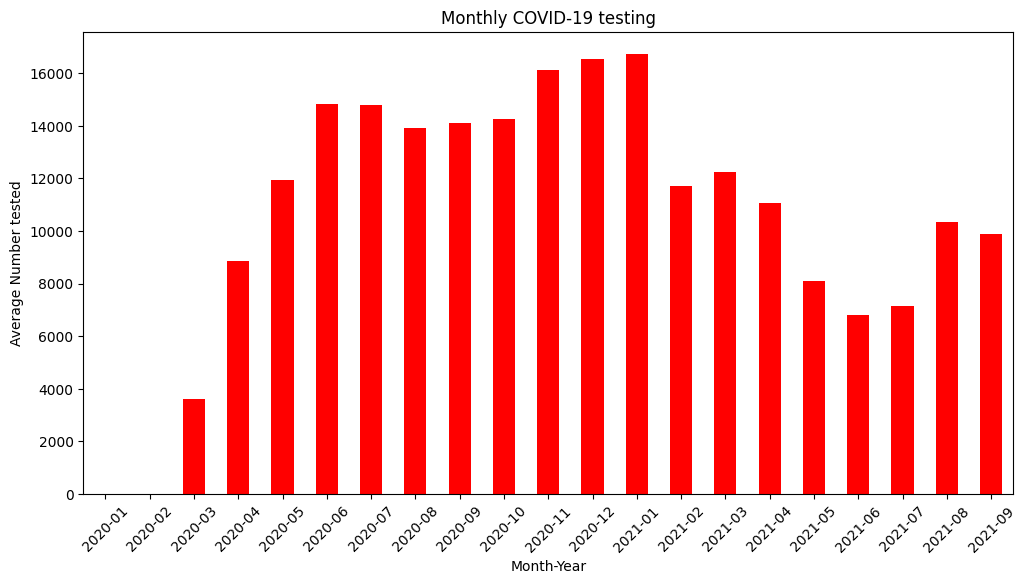

In [60]:
monthly_deaths = monthly_data['Number_tested']

# Plotting
plt.figure(figsize=(12, 6))
monthly_deaths.plot(kind='bar', color='red')
plt.title('Monthly COVID-19 testing')
plt.xlabel('Month-Year')
plt.ylabel('Average Number tested')
plt.xticks(rotation=45)
plt.show()

### 3.Pie Chart by outcome percentages of total confirmed patient

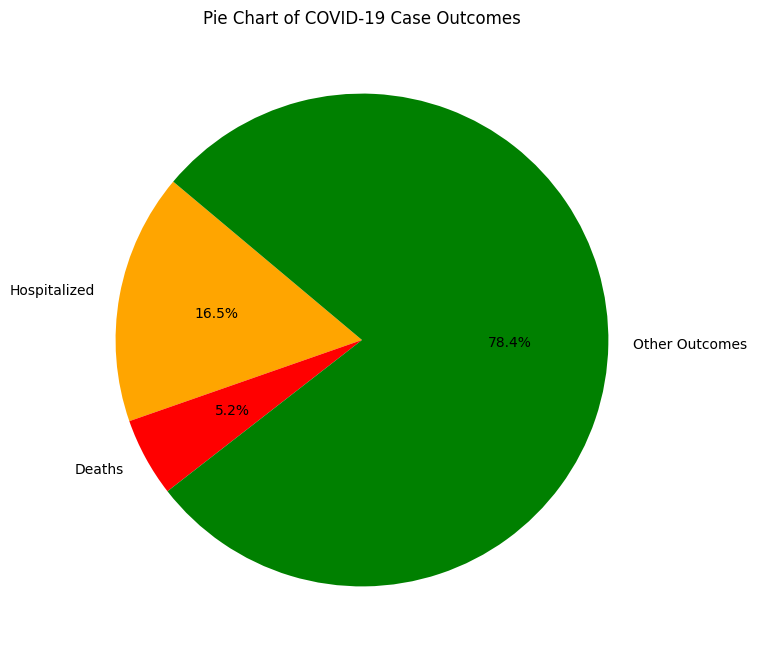

In [66]:
total_cases = total_confirmed
total_hospitalized = df['Number_hospitalized'].sum()
total_deaths = df['Number_deaths'].sum()
total_others = total_cases - total_hospitalized - total_deaths

case_outcomes = [total_hospitalized, total_deaths, total_others]
labels = ['Hospitalized', 'Deaths', 'Other Outcomes']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(case_outcomes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['orange', 'red', 'green'])
plt.title('Pie Chart of COVID-19 Case Outcomes')
plt.show()

### 4.Stacked Area Chart of Monthly COVID-19 Testing

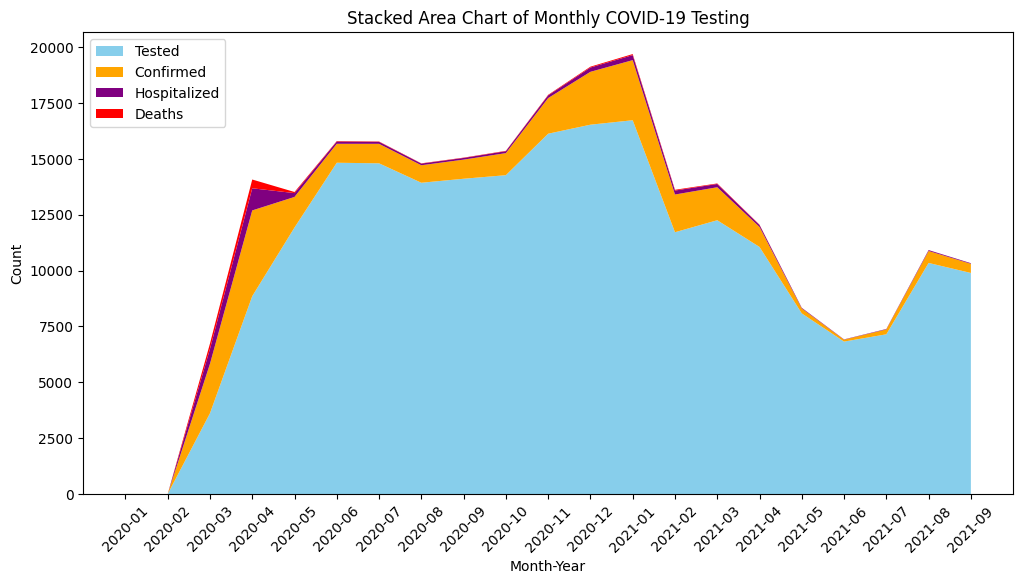

In [69]:
plt.figure(figsize=(12, 6))
plt.stackplot(monthly_data.index.astype(str), monthly_data['Number_tested'], monthly_data['Number_confirmed'],
              monthly_data['Number_hospitalized'], monthly_data['Number_deaths'], labels=['Tested', 'Confirmed', 'Hospitalized', 'Deaths'],
              colors=['skyblue', 'orange', 'purple', 'red'])
plt.title('Stacked Area Chart of Monthly COVID-19 Testing')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

### 5.Violin Plot of Confirmed Cases

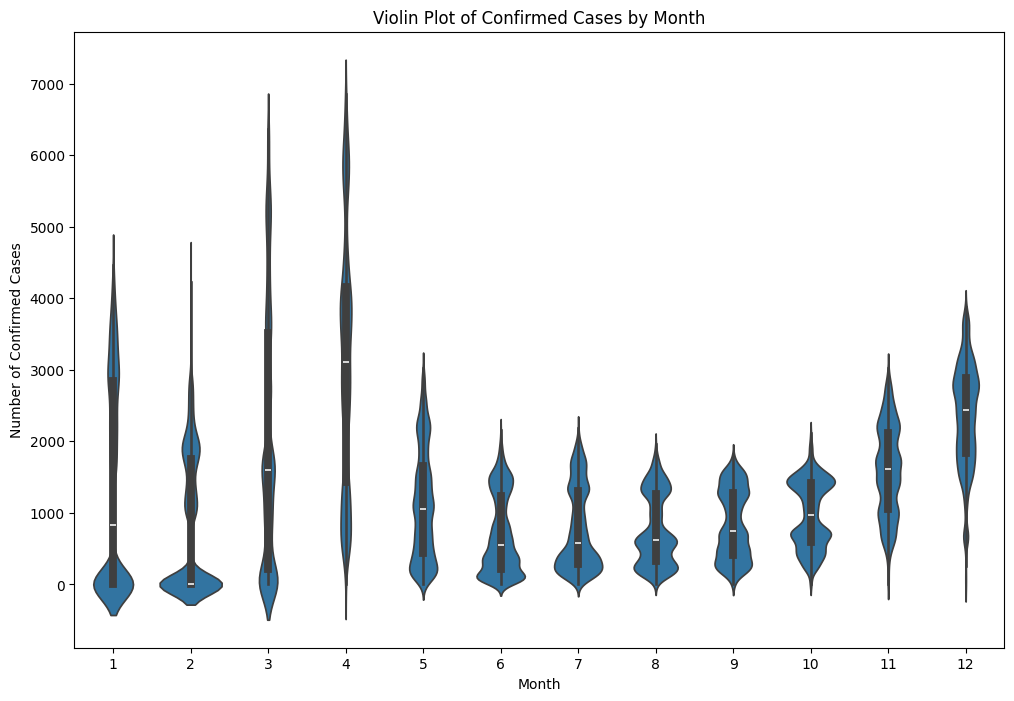

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df['month'] = df['specimen_date'].dt.month
data = df[['Number_confirmed', 'month']]
plt.figure(figsize=(12, 8))
sns.violinplot(x='month', y='Number_confirmed', data=data)
plt.title('Violin Plot of Confirmed Cases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Confirmed Cases')
plt.show()